In [36]:
import os
import sys
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
sys.path.append('..')

In [58]:
from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

## Load Image

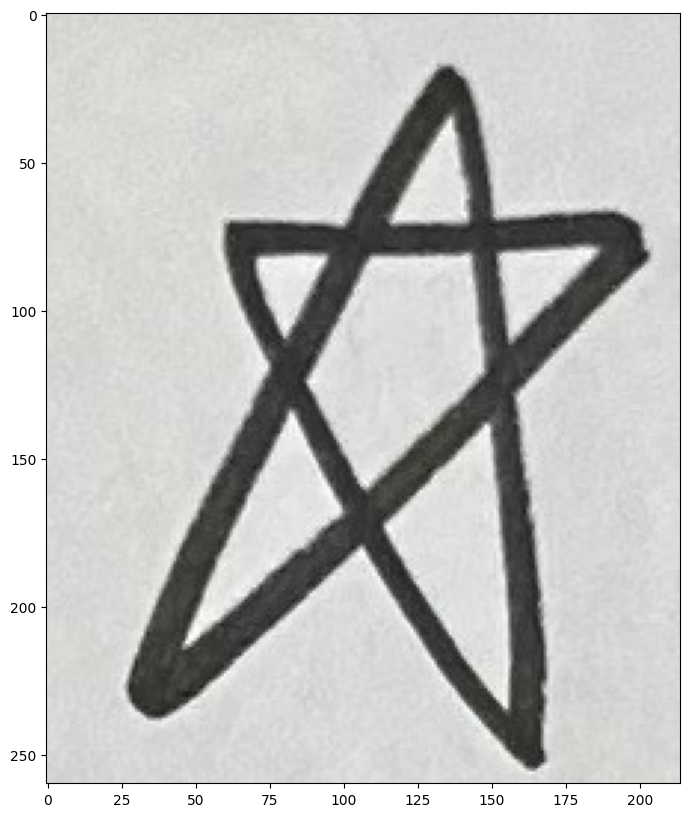

In [41]:
image = imread('/home/kkyu/amr_ws/DL/data/shape_figure/train/star_600.jpg')

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

## Download EfficientNet

In [39]:
# loading pretrained model
model = EfficientNetB0(weights='imagenet')

2024-03-01 21:15:43.976495: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 21:15:43.977232: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-01 21:15:43.977335: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

21826536/21826536 [==============================] - 3s 0us/step


## Cener Crop and Resize

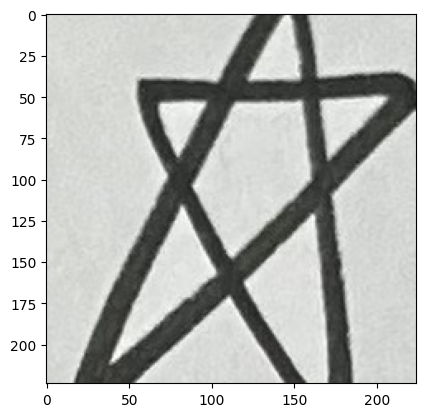

In [47]:
image_size = model.input_shape[1] # 224

x = center_crop_and_resize(image, image_size=image_size)

plt.imshow(x.astype(np.uint8))

## Preprocess Input

In [48]:
x = preprocess_input(x)
x = np.expand_dims(x, 0)

y = model.predict(x)

dy = decode_predictions(y)

print(dy)

1/1 [==============================] - 0s 18ms/step
[[('n03376595', 'folding_chair', 0.3414547), ('n03532672', 'hook', 0.051028326), ('n03000134', 'chainlink_fence', 0.030458685), ('n03584829', 'iron', 0.023293974), ('n03961711', 'plate_rack', 0.013375187)]]


## Define Inference Function

In [49]:
def inference(model, image_path):
    image = imread(image_path)
    
    image_size = model.input_shape[1] # 224
    cx = center_crop_and_resize(image, image_size=image_size)
    
    x = preprocess_input(cx)
    x = np.expand_dims(x, 0)

    y = model.predict(x)
    dy = decode_predictions(y)[0]
    
    for idx, label, confidence in dy:
        print('%s: %.2f%%' % (label, confidence * 100))
    
    plt.figure(figsize=(5, 5))
    plt.imshow(cx.astype(np.uint8))
    plt.show()

## Test

1/1 [==============================] - 0s 17ms/step
folding_chair: 34.15%
hook: 5.10%
chainlink_fence: 3.05%
iron: 2.33%
plate_rack: 1.34%


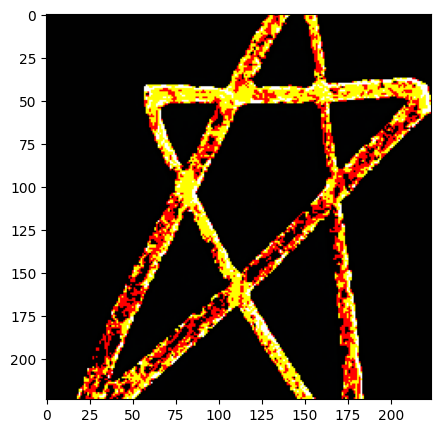

In [50]:
inference(model, '/home/kkyu/amr_ws/DL/data/shape_figure/train/star_600.jpg')


1/1 [==============================] - 0s 15ms/step
hook: 47.38%
nail: 8.66%
nematode: 5.30%
mailbag: 1.77%
cleaver: 1.38%


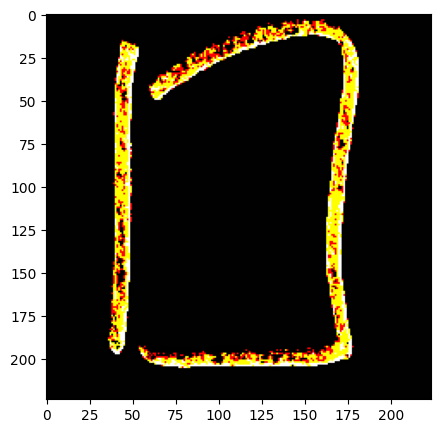

In [53]:
inference(model, '/home/kkyu/amr_ws/DL/data/shape_figure/train/rec_459.jpg')


1/1 [==============================] - 0s 14ms/step
hook: 18.29%
can_opener: 8.67%
swab: 8.60%
safety_pin: 6.98%
shovel: 3.91%


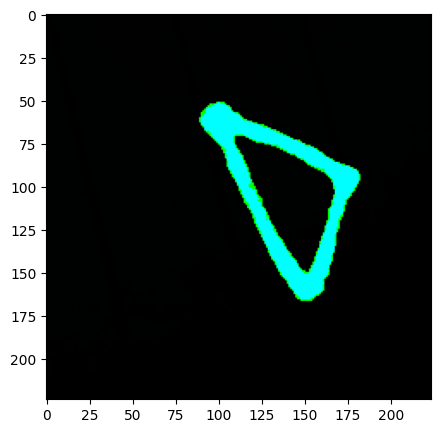

In [54]:
inference(model, '/home/kkyu/amr_ws/DL/data/shape_figure/train/tri_1000059.jpg')


## EfficientNetB3

In [59]:
model3 = EfficientNetB3(weights='imagenet')

50086816/50086816 [==============================] - 6s 0us/step


1/1 [==============================] - 1s 1s/step
folding_chair: 41.47%
matchstick: 4.75%
hook: 3.08%
rocking_chair: 1.11%
bolo_tie: 1.01%


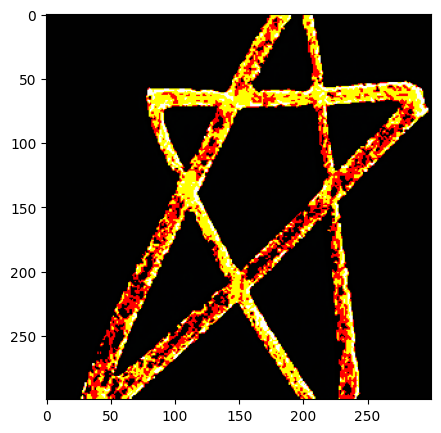

In [60]:
inference(model3, '/home/kkyu/amr_ws/DL/data/shape_figure/train/star_600.jpg')


1/1 [==============================] - 0s 17ms/step
castle: 94.25%
palace: 0.56%
monastery: 0.20%
vault: 0.04%
prison: 0.03%


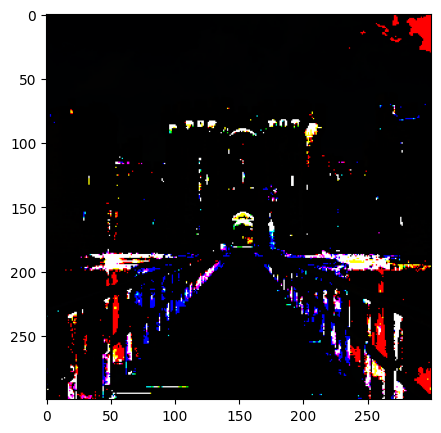

In [62]:
inference(model3, '/home/kkyu/amr_ws/DL/data/castle.jpg')
